In [13]:
# Import Basis
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
















from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

from sklearn.metrics import *
# Paellete
# palette = ["#00B1D2FF", "#FDDB27FF"]
palette = ["#FAD0C9FF", "#6E6E6DFF"]

color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [21]:
tr_d = pd.read_csv("C:\\Users\\guru017\\Downloads\\clothes_price_prediction_data.csv")


In [25]:
# Function 4 Data Overview
def print_boxed_blue_heading(heading):
    gradient = [Fore.BLUE, Fore.CYAN, Fore.GREEN, Fore.YELLOW, Fore.RED, Fore.MAGENTA]
    print("\n" + "=" * (len(heading) + 4))
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
        else:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")
    print("=" * (len(heading) + 4))

def print_error(message):
    raise ValueError(message)

def D_O(train_df):
    try:

        # Display head of the training dataset nicely
        print_boxed_blue_heading("The Head Of Train Dataset is:")
        display(HTML(train_df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        # Display tail of the training dataset nicely
        print_boxed_blue_heading("The Tail Of Train Dataset is:")
        display(HTML(train_df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        print_boxed_blue_heading("Shape Data:")
        print(f'The Shape of the Train Data is {train_df.shape} |')
        print(f'- 1.The No of Rows is {train_df.shape[0]} |')
        print(f'- 2.The No of Cols is {train_df.shape[1]}|')
        
        print('\n')
        
        print_boxed_blue_heading("Info Of Train Data:")
        train_df.info()

        # Describe both numerical and categorical data
        print_boxed_blue_heading("Numerical Summary of Train Data:")
        print(f"\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Summary of Train Data is:{Style.RESET_ALL}")
        display(train_df.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'skyblue')]}]))

        Cat_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'O']
        print_boxed_blue_heading("Categorical Columns of Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Categorical Columns of Train Data are :{Style.RESET_ALL} {Cat_cols_train}')

        N_cols_train = [col for col in train_df.columns if train_df[col].dtype == 'float']
        print_boxed_blue_heading("Numerical Columns of Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Columns of Train Data are :{Style.RESET_ALL} {N_cols_train}\n')

        print_boxed_blue_heading("Null Values in Train Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Null Values of Train Data are:{Style.RESET_ALL}\n{train_df.isnull().sum()}')

        print_boxed_blue_heading("Duplicates Check in Train Data:")
        if train_df.duplicated().any():
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}Duplicates exist in the train dataset.{Style.RESET_ALL}')
        else:
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}No duplicates found in the train dataset.{Style.RESET_ALL}')

        print('\n' + "=" * 100 + '\n')
        
    except Exception as e:
        print_error(f"An error occurred: {str(e)}")       

In [27]:
D_O(tr_d)


| The | Head | Of | Train | Dataset | is: |


Brand,Category,Color,Size,Material,Price
New Balance,Dress,White,XS,Nylon,182
New Balance,Jeans,Black,XS,Silk,57
Under Armour,Dress,Red,M,Wool,127
Nike,Shoes,Green,M,Cotton,77
Adidas,Sweater,White,M,Nylon,113





| The | Tail | Of | Train | Dataset | is: |


Brand,Category,Color,Size,Material,Price
Puma,Jeans,Black,L,Polyester,176
Puma,Jacket,Red,XXL,Silk,110
Reebok,Sweater,Blue,XS,Denim,127
Under Armour,Sweater,Black,XXL,Denim,69
New Balance,Jacket,Yellow,XS,Wool,174





| Shape | Data: |
The Shape of the Train Data is (1000, 6) |
- 1.The No of Rows is 1000 |
- 2.The No of Cols is 6|



| Info | Of | Train | Data: |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB

| Numerical | Summary | of | Train | Data: |

The Numerical Summary of Train Data is:


,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000



| Categorical | Columns | of | Train | Data: |

The Categorical Columns of Train Data are : ['Brand', 'Category', 'Color', 'Size', 'Material']

| Numerical | Columns | of | Train | Data: |

The Numerical Columns of Train Data are : []


| Null | Values | in | Train | Data: |

The Null Values of Train Data are:
Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

| Duplicates | Check | in | Train | Data: |

No duplicates found in the train dataset.




In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def single_plot_distribution(column_name, data):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[column_name], order=data[column_name].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {column_name}')
    plt.show()


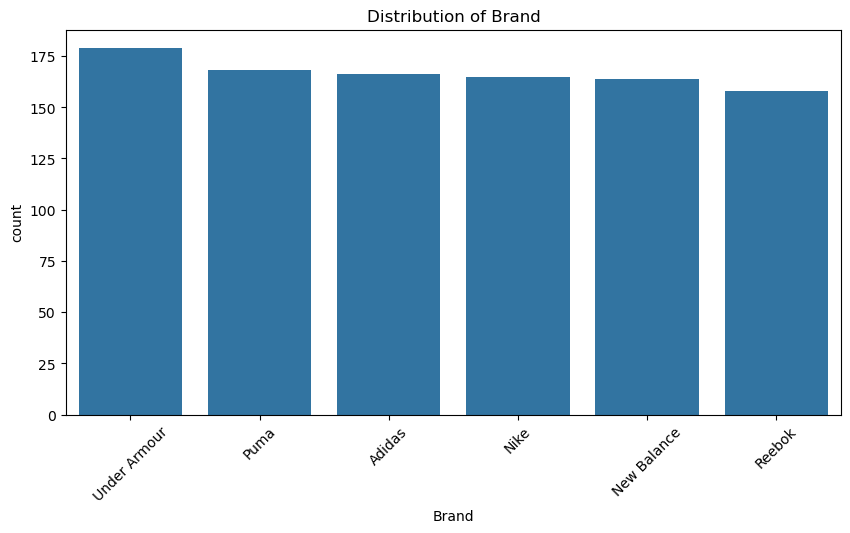

In [35]:
single_plot_distribution('Brand', tr_d)


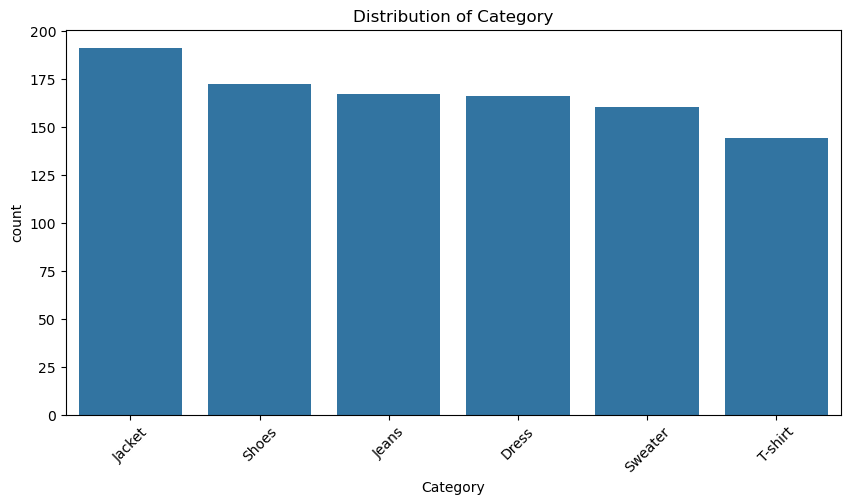

In [37]:
single_plot_distribution('Category',tr_d)

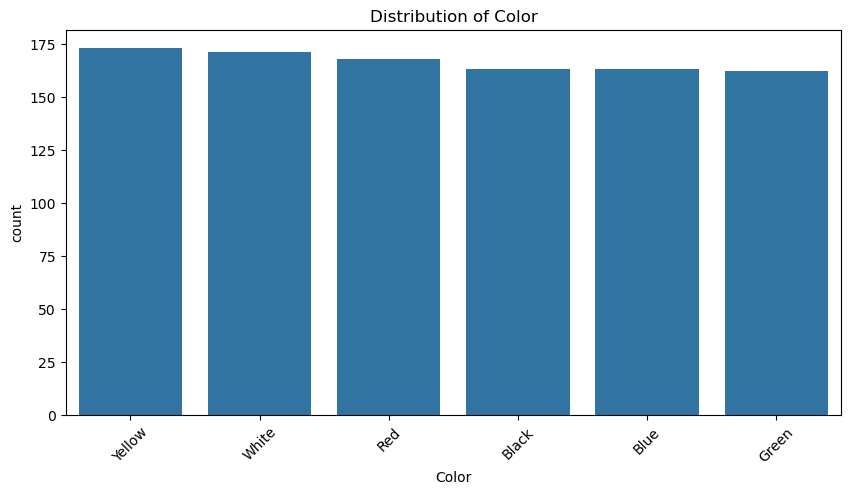

In [39]:
single_plot_distribution('Color',tr_d)

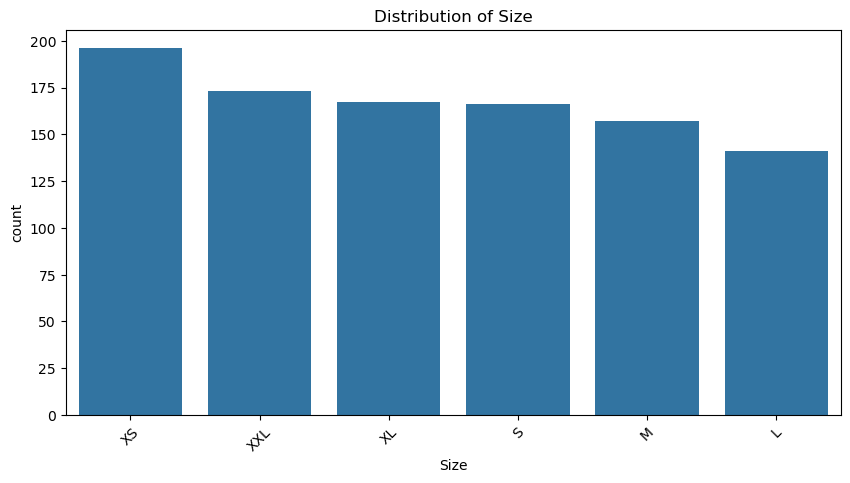

In [41]:
single_plot_distribution('Size',tr_d)

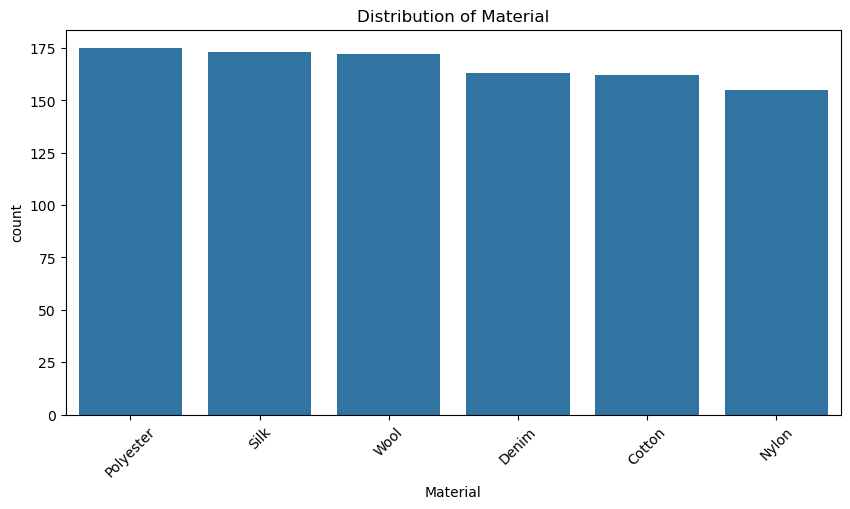

In [43]:
single_plot_distribution('Material',tr_d)

In [45]:
def advanced_violin_plot(x_column, y_column, dataframe):
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=x_column, y=y_column, data=dataframe, palette=palette)
    plt.title(f'Violin Plot of {x_column} vs {y_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.grid(True)
    plt.show()

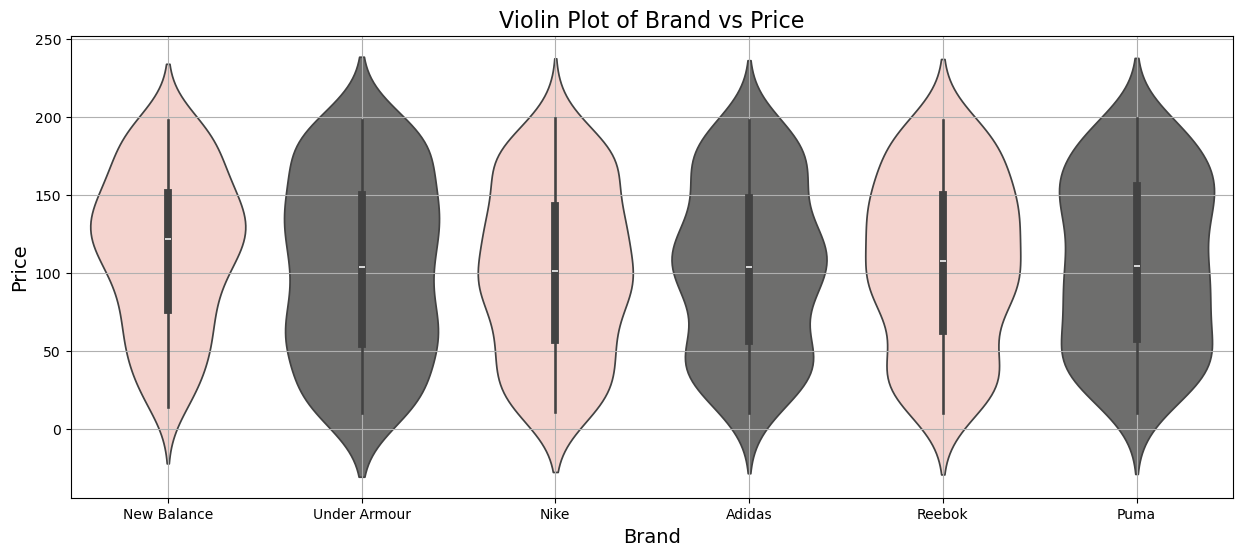

In [47]:
# Brand Vs Price , Hue by Size
advanced_violin_plot('Brand', 'Price', tr_d)

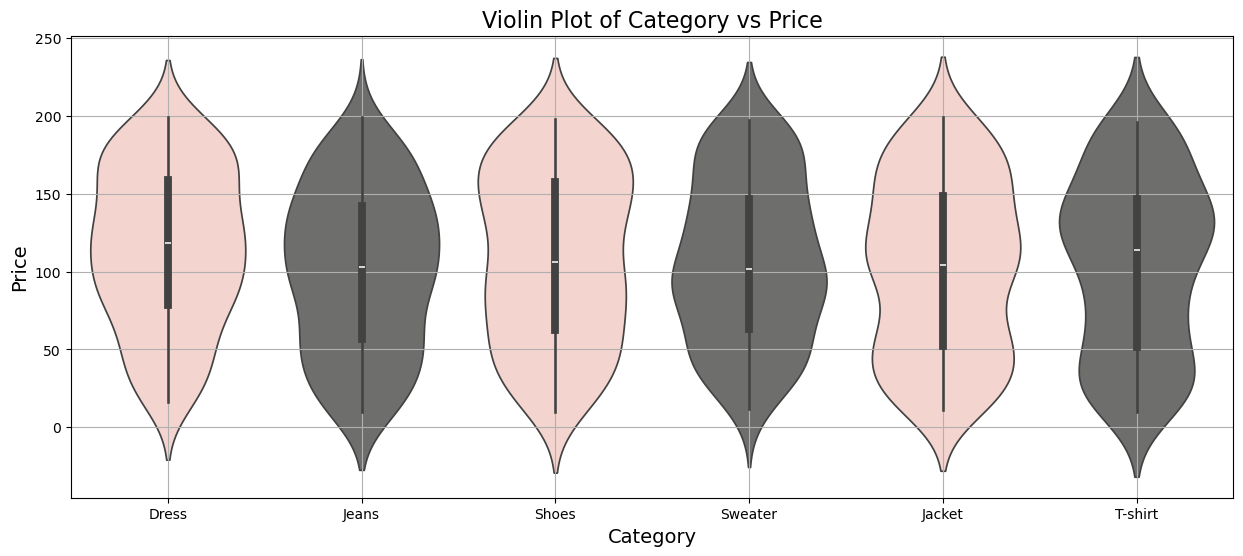

In [49]:
advanced_violin_plot('Category', 'Price', tr_d)

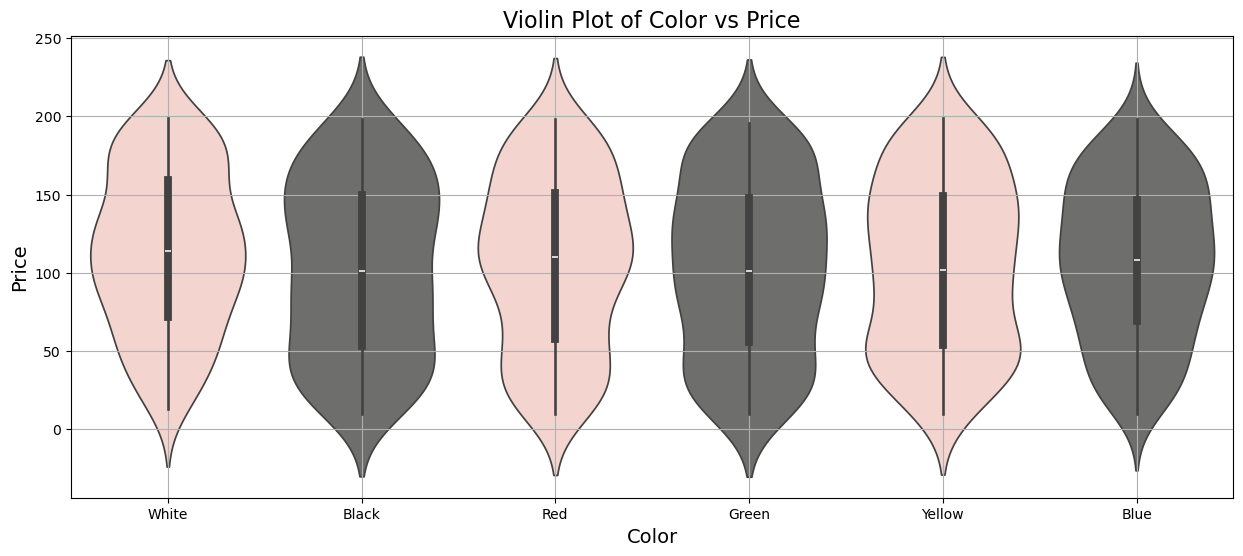

In [51]:
# Brand Vs Price , Hue by Color
advanced_violin_plot('Color', 'Price', tr_d)

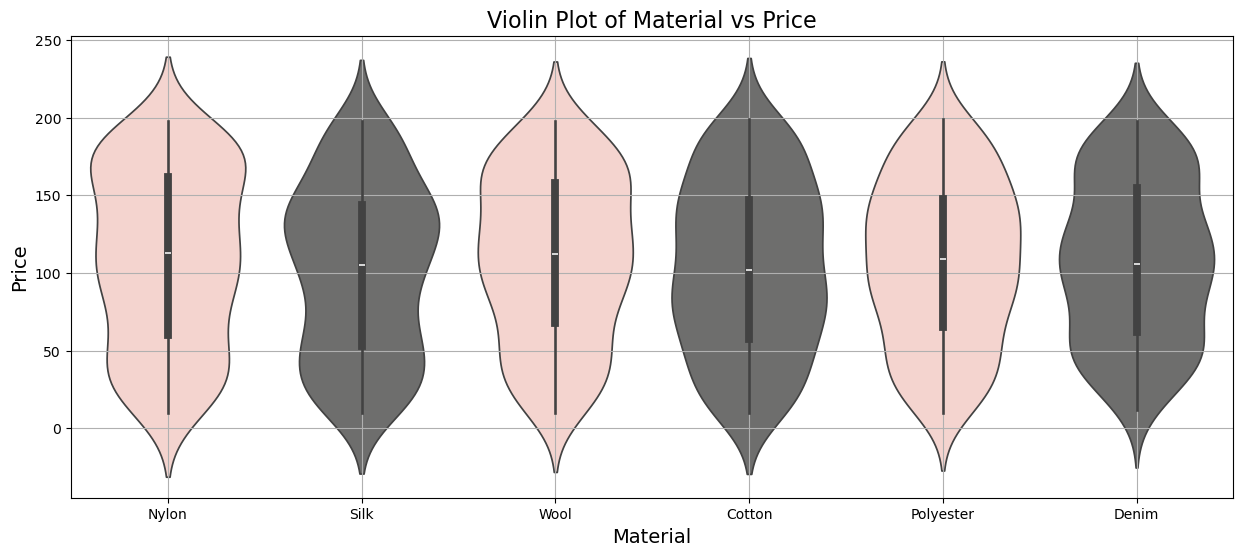

In [53]:
# Brand Vs Price , Hue by Color
advanced_violin_plot('Material', 'Price', tr_d)

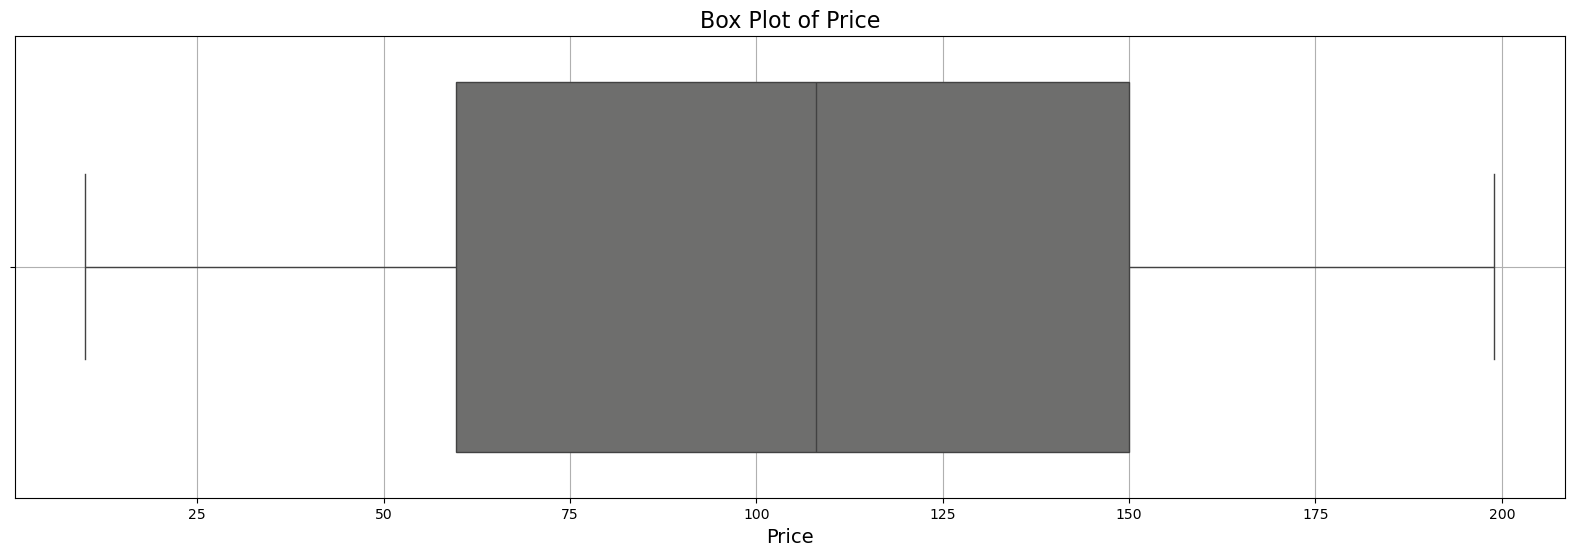

In [55]:
# Num Col
num_col = 'Price'

# Create a box plot for the selected numerical column
plt.figure(figsize=(20, 6))
sns.boxplot(x=num_col, data=tr_d, color=palette[1]) 
plt.title(f'Box Plot of {num_col}', fontsize=16)
plt.xlabel(num_col, fontsize=14)
plt.grid(True)
plt.show()

In [59]:
# # # =================================================================================================================
# # #                        Cat - Cols
# #================================================================================================================== 
CAT_COL_E = ['Brand', 'Category', 'Color', 'Size', 'Material']

# # # =================================================================================================================
# # #                        Function to Enocde Data 
# #================================================================================================================== 
def E_D(data, columns, method='L'):
    encoded_data = data.copy()  # Make a copy of the input data
    
    if method == 'L':
        # Initialize LabelEncoder
        L_E = LabelEncoder()
        
        # Encode categorical columns using LabelEncoder
        for col in columns:
            encoded_data[col] = L_E.fit_transform(encoded_data[col])
    
    elif method == 'D':
        # Create dummy variables for categorical columns
        dummy_cols = pd.get_dummies(encoded_data[columns], prefix=columns)
        
        # Concatenate dummy variables with original data
        encoded_data = pd.concat([encoded_data, dummy_cols], axis=1)
        
        # Drop the original categorical columns
        encoded_data = encoded_data.drop(columns, axis=1)
    
    else:
        raise ValueError("Invalid method! Please choose either 'L' or 'D'.")
    
    return encoded_data

In [61]:
# # # =================================================================================================================
# # #                        Encode Train Data 
# #================================================================================================================== 
tr_d = E_D(tr_d, CAT_COL_E , 'D')
print_boxed_blue_heading('Data is Encoded Successfully')


| Data | is | Encoded | Successfully |


In [63]:
# # # =================================================================================================================
# # #                         X < y 
# # #================================================================================================================== 
X_T = tr_d.drop('Price', axis=1)
y_T = np.log1p(tr_d['Price']) 

# # # =================================================================================================================
# # #                         Train < Test Split
# # #================================================================================================================== 
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# # # =================================================================================================================
# # #                         Shapes < 
# # #================================================================================================================== 
print_boxed_blue_heading(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}")
print_boxed_blue_heading(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}")


| Training | set | shape | - | X: | (900, | 30), | y: | (900,) |

| Testing | set | shape | - | X: | (100, | 30), | y: | (100,) |


In [7]:
# # # =================================================================================================================
# # #                        Params <  Classifier
# # #==================================================================================================================
lgb_params = {
    'n_estimators': 899,
    'learning_rate': 0.013003893032117776,
    'max_depth': 18,
    'reg_alpha': 0.9218377389528793,
    'reg_lambda': 0.020694654173173645,
    'num_leaves': 24,
    'subsample': 0.7402011916024158,
    'colsample_bytree': 0.25484261764678784,
    'verbose' : -1
}
cat_params = {
    'n_estimators': 853,
    'learning_rate': 0.10899577626375372,
    'depth': 7,
    'colsample_bylevel': 0.7340962061535496,
    'random_strength': 6.262882561405091,
    'min_data_in_leaf': 92,
    'verbose': 0,

}
# # # =================================================================================================================
# # #                        Function < Cross Validate Classifier
# # #================================================================================================================== 
def Cross_Validate_R(reg , params, SCORING, N_CV):
    # # # =================================================================================================================
    # # #                        Train < CAT Classifier
    # # #================================================================================================================== 
    BASE = reg(**params)
    CV = cross_val_score(BASE,
                           X_T, 
                           y_T, 
                           scoring=SCORING,
                           cv=N_CV, 
                           n_jobs=-1)
    # # # =================================================================================================================
    # # #                        MSLE AUC < CAT Classifier
    # # #================================================================================================================== 
    print_boxed_blue_heading(f"The MSLE Of {reg} Regressor is: {-1*CV.mean()}")

In [9]:
# # # =================================================================================================================
# # #                        Train <  Light
# # #==================================================================================================================
Cross_Validate_R(lgb.LGBMRegressor,lgb_params,'neg_mean_squared_log_error',10)

NameError: name 'lgb' is not defined

In [11]:
# # # =================================================================================================================
# # #                        Train <  Cat
# # #==================================================================================================================
Cross_Validate_R(CatBoostRegressor,cat_params,'neg_mean_squared_log_error',10)

NameError: name 'CatBoostRegressor' is not defined